In [11]:
import matplotlib.pyplot as plt
import simexpal
import yaml

cfg = simexpal.config_for_dir()

results = []
for run in cfg.collect_successful_results():
    with run.open_output_file() as f:
        yml = yaml.load(f, Loader=yaml.SafeLoader)
    results.append(yml)

for r in sorted(results, key=lambda r: (r['fill_factor'], r['algo'])):
    print('Algorithm {}, fill factor {} takes: {} ms (insert), {} ms (lookup)'.format(
          r['algo'], r['fill_factor'], r['time_insert'], r['time_lookup']))

Algorithm chaining, fill factor 0.5 takes: 8452 ms (insert), 1538 ms (lookup)
Algorithm linear, fill factor 0.5 takes: 1430 ms (insert), 871 ms (lookup)
Algorithm quadratic, fill factor 0.5 takes: 1554 ms (insert), 934 ms (lookup)
Algorithm robin_hood, fill factor 0.5 takes: 1501 ms (insert), 876 ms (lookup)
Algorithm stl, fill factor 0.5 takes: 23848 ms (insert), 5914 ms (lookup)
Algorithm chaining, fill factor 0.8 takes: 14606 ms (insert), 2711 ms (lookup)
Algorithm linear, fill factor 0.8 takes: 2656 ms (insert), 1554 ms (lookup)
Algorithm quadratic, fill factor 0.8 takes: 2974 ms (insert), 1748 ms (lookup)
Algorithm robin_hood, fill factor 0.8 takes: 2798 ms (insert), 1593 ms (lookup)
Algorithm stl, fill factor 0.8 takes: 41905 ms (insert), 9097 ms (lookup)
Algorithm chaining, fill factor 0.9 takes: 16758 ms (insert), 3142 ms (lookup)
Algorithm linear, fill factor 0.9 takes: 3246 ms (insert), 1843 ms (lookup)
Algorithm quadratic, fill factor 0.9 takes: 3616 ms (insert), 2109 ms (lo

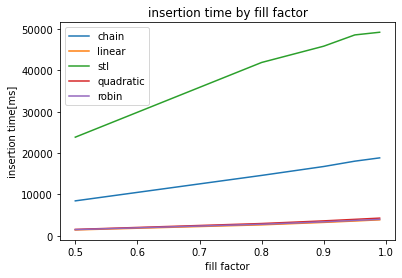

In [12]:
# filter results by algorithm
res_chain  = list(filter(lambda x: x['algo'] == 'chaining', results))
res_linear = list(filter(lambda x: x['algo'] == 'linear', results))
res_stl    = list(filter(lambda x: x['algo'] == 'stl', results))
res_quad   = list(filter(lambda x: x['algo'] == 'quadratic', results))
res_robin  = list(filter(lambda x: x['algo'] == 'robin_hood', results))

# filter for the plot lines
x = [i['fill_factor'] for i in res_chain]
y_chain_insert  = [i['time_insert'] for i in res_chain]
y_chain_lookup  = [i['time_lookup'] for i in res_chain]
y_chain_misses  = [i['time_misses'] for i in res_chain]
y_linear_insert = [i['time_insert'] for i in res_linear]
y_linear_lookup = [i['time_lookup'] for i in res_linear]
y_linear_misses = [i['time_misses'] for i in res_linear]
y_stl_insert    = [i['time_insert'] for i in res_stl]
y_stl_lookup    = [i['time_lookup'] for i in res_stl]
y_stl_misses    = [i['time_misses'] for i in res_stl]
y_quad_insert   = [i['time_insert'] for i in res_quad]
y_quad_lookup   = [i['time_lookup'] for i in res_quad]
y_quad_misses   = [i['time_misses'] for i in res_quad]
y_robin_insert  = [i['time_insert'] for i in res_robin]
y_robin_lookup  = [i['time_lookup'] for i in res_robin]
y_robin_misses  = [i['time_misses'] for i in res_robin]

# plot the insertion
plt.plot(x, y_chain_insert, label = 'chain')
plt.plot(x, y_linear_insert, label = 'linear')
plt.plot(x, y_stl_insert, label = 'stl')
plt.plot(x, y_quad_insert, label = 'quadratic')
plt.plot(x, y_robin_insert, label = 'robin')
plt.title('insertion time by fill factor')
plt.xlabel('fill factor')
plt.ylabel('insertion time[ms]')
plt.legend()
plt.savefig('insert_fill.pdf')
plt.show()

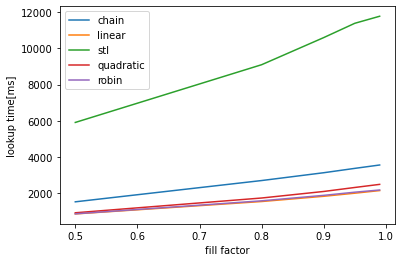

In [13]:
# plot the lookup
plt.plot(x, y_chain_lookup, label = 'chain')
plt.plot(x, y_linear_lookup, label = 'linear')
plt.plot(x, y_stl_lookup, label = 'stl')
plt.plot(x, y_quad_lookup, label = 'quadratic')
plt.plot(x, y_robin_lookup, label = 'robin')
plt.xlabel('fill factor')
plt.ylabel('lookup time[ms]')
plt.legend()
plt.savefig('lookup_fill.pdf')
plt.show()

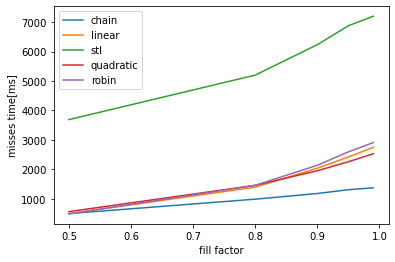

In [17]:
# plot the misses time
plt.plot(x, y_chain_misses, label = 'chain')
plt.plot(x, y_linear_misses, label = 'linear')
plt.plot(x, y_stl_misses, label = 'stl')
plt.plot(x, y_quad_misses, label = 'quadratic')
plt.plot(x, y_robin_misses, label = 'robin')
plt.xlabel('fill factor')
plt.ylabel('misses time[ms]')
plt.legend()
plt.savefig('misses_fill.pdf')
plt.show()